

## Summary

In this project, we will be analyzing local and Global temperatures.We will then compare the different temperature trends between Victoria and the overall global temperature. 

We show the trend by making a comparison graph which is plotted from year 1828 to year 2015. Rather than the yearly average, we use a 7 year moving average to get a better picture of the analysis. Some points to remember.

* The moving average was calculated through **Excel Sheet** before importing to python.
* The rest of the analysis was done in **Python Jupyter Notebook**.

There are some key considerations taken into account on deciding how to visulize the trends
* It was decided that both datasets should have equal rows and should be plotted with the year as a the common axis with proper coloring to show the respective plots.
* Proper subsetting of the data needs to be done.
    - global_data should be subsetted from 1828 to 2015
    - city_data should be subsetted for **Victoria**
    
These are the basic considerations done to get the visualization. I am sure we can add more constraints to get a better pixture of the same.



## Moving Average
* The 7 year moving average for Victoria Dataset. Once a cell has been assigned a moving average, the cells are dragged to the whole dataset.



<img src="Victoria_movingavg.jpg" style="width:300px;height:200px" />


* Similarly the 7 year moving average for global data. Once a cell has been assigned a moving average, the cells are dragged to the whole dataset.


<img src="Global_movingavg.jpg" style="width:300px;height:200px" />





## Getting data from SQL

To get data from the city_data we put in the following **SQL COMMAND**

* *SELECT* *
* *FROM city_data* 
* *WHERE city = 'Victoria'*
* *AND country = 'Canada'*;

To get data from the global_data we put in the following **SQL COMMAND**

* *SELECT* *
* *FROM global_data* ;

We will then download the csv file and put it for further analysis.





## Importing libraries for Analysis

We are importing the required libraries for our analysis.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Lets import the city_data.csv data and explore the 1st few rows.


In [2]:
city_data = pd.read_csv('city_data_victoria.csv')
print(city_data.head())

   year      city country  avg_temp  moving_average
0  1828  Victoria  Canada      6.83             NaN
1  1829  Victoria  Canada      6.58             NaN
2  1830  Victoria  Canada       NaN             NaN
3  1831  Victoria  Canada       NaN             NaN
4  1832  Victoria  Canada      3.25             NaN




Lets import the global_data.csv data and explore the 1st few rows.


In [3]:
# Lets look at the global dataframe
global_data = pd.read_csv('global_data.csv')
print(global_data.head())

   year  avg_temp  moving_average
0  1750      8.72             NaN
1  1751      7.98             NaN
2  1752      5.78             NaN
3  1753      8.39             NaN
4  1754      8.47             NaN





## Cleaning the Data

Here we explore our dataset and get more information for the comparison. This comprises of,
* Removing Na's
* Removing unnecessary Columns
* Reindexing
* Subsetting 

Below we take the city_data dataset and make a subset called Victoria_temp containing the data for the city called Victoria. We will further remove the unnecessary columns and reindex the new dataset.



In [4]:
# Subsetting for My closest City which is Victoria. Also Dropping unnecessary columns and also resetting the index.
Victoria_temp = city_data.reset_index().drop(['country', 'city','index','avg_temp'], axis = 1)
print(Victoria_temp)

     year  moving_average
0    1828             NaN
1    1829             NaN
2    1830             NaN
3    1831             NaN
4    1832             NaN
..    ...             ...
181  2009            8.13
182  2010            8.11
183  2011            7.86
184  2012            7.79
185  2013            8.01

[186 rows x 2 columns]




It is also very important to make sure all the columns have proper datatypes for ploting.


In [5]:

#Changing DataType for Moving average from 'object' to 'float'
Victoria_temp['moving_average'] = Victoria_temp['moving_average'].astype('float')
print(Victoria_temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            186 non-null    int64  
 1   moving_average  180 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.0 KB
None


In [6]:
print(Victoria_temp)

     year  moving_average
0    1828             NaN
1    1829             NaN
2    1830             NaN
3    1831             NaN
4    1832             NaN
..    ...             ...
181  2009            8.13
182  2010            8.11
183  2011            7.86
184  2012            7.79
185  2013            8.01

[186 rows x 2 columns]




Now in the global_data dataset, we can subset the same number of rows as the Victoria_temp dataset so that we can use the *Year* column to be a common x axis.


In [7]:
# Indexing to same number of rows
global_data = global_data[global_data['year'] >= 1828]
print(global_data)

     year  avg_temp  moving_average
78   1828      8.17             NaN
79   1829      7.94             NaN
80   1830      8.52             NaN
81   1831      7.64             NaN
82   1832      7.45             NaN
..    ...       ...             ...
261  2011      9.52            9.59
262  2012      9.51            9.56
263  2013      9.61            9.57
264  2014      9.57            9.55
265  2015      9.83            9.61

[188 rows x 3 columns]







## Exploratory Data Analysis - Plotting

Now we can plot the data and compare the Average Victoria temperatures vs Average Global temperatures

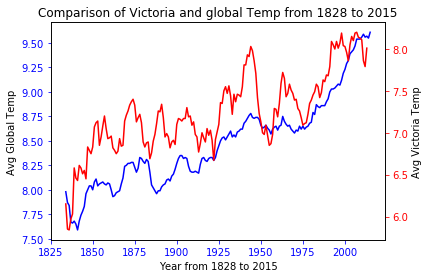

In [8]:
fig, ax = plt.subplots()
ax.plot(global_data.year,global_data.moving_average, color = 'b')
ax.set_ylabel('Avg Global Temp')
ax.set_xlabel('Year from 1828 to 2015')
ax.tick_params( colors = 'blue')
ax2 = ax.twinx()
ax2.plot(Victoria_temp.year,Victoria_temp.moving_average, color = 'r')
ax2.tick_params(colors = 'red')
ax2.set_ylabel('Avg Victoria Temp')
ax.set_title('Comparison of Victoria and global Temp from 1828 to 2015')
plt.show()

## Observations

* On an average, Victoria shows higher Average temperatures than Global average temperatures throughout the period of analysis but only by 0.5 degrees. 

* It is very interesting to see that Average temperatures from Victoria follow a similar trend of the Average temperatures from Global scale for the period of analysis. There are a few outliers which may have been formed because of error in reporting or other causes which require a more in depth analysis.

* It seems that the overall trend suggests the world is getting hotter in the years to come. This trend began in the early *1940's till date*.

* The temperatures seem to have risen at a much higher rate from *1975 till date* and seems to be rising every year.

## Conclusions

From this small analysis we are able to get a lot of analysis on the average temperature rise over the years but we need to understand that further analysis is needed to get more information from the dataset and add to the above observations.

